In [10]:
import numpy as np
from array import *
import csv

# using datetime module
import datetime;
from typing import List

# Binary Search
from bisect import bisect_left
from bisect import bisect_right

import matplotlib.pyplot as plt
import json

import multiprocessing as mp
from multiprocessing import Process, Queue
from multiprocessing import current_process
import queue
import threading


from itertools import combinations
import copy


import os
#os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
#from pyspark.sql import SparkSession
#import pyspark.pandas as ps
#from pyspark.sql.functions import col
import pandas as pd

import random
import networkx as nx
from tqdm import tqdm


#https://python-louvain.readthedocs.io/en/latest/api.html
#community.modularity(partition, graph, weight='weight')
#from community import modularity

import pickle

import powerlaw


print('----------------------')
#unique_payment_addresses_len = len(unique_payment_addresses)
unique_raw_addresses_len        = 40330345
unique_payment_addresses_len    = 40324960
unique_delegation_addresses_len = 3868049
print('unique_raw_addresses_len        = ', unique_raw_addresses_len)
print('unique_payment_addresses_len    = ', unique_payment_addresses_len)
print('unique_delegation_addresses_len = ', unique_delegation_addresses_len)

INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2023-01-21 17:39:30', '%Y-%m-%d %H:%M:%S').date()
total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1


print('----------------------')
print('done!')



----------------------
unique_raw_addresses_len        =  40330345
unique_payment_addresses_len    =  40324960
unique_delegation_addresses_len =  3868049
----------------------
done!


In [11]:
print('----------------------')

#print(os.path.basename("/path/to/some/file.txt"))
#print(os.path.dirname("/path/to/some/file.txt"))

BASE_ADDRESS = '/local/scratch/exported/Cardano_MCH_2023_1'
TEMP_ADDRESS = BASE_ADDRESS + '/temp_files/'


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')



print('----------------------')
print('done!')


----------------------
----------------------
done!


In [12]:
# Define required methods:


print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)



##########################################################################################
def parent (id1, parents_array):
    return parents_array[id1];

##########################################################################################
def find_parent (id1, parents_array):
    while (id1 != parent(id1, parents_array)):
        new_parent = parent(parent(id1, parents_array), parents_array);
        id1        = new_parent;
    
    return id1

##########################################################################################
# Link two addresses based on "Union-Find" Algorithm:
def link_address (addr_position_1, addr_position_2, parents_array):
    id1 = find_parent(addr_position_1, parents_array)
    id2 = find_parent(addr_position_2, parents_array)

    if (id1 == id2):
        return

    # make sure always we have id1 > id2
    if id1 < id2:
        x = id1
        id1 = id2
        id2 = x

    parents_array[id1] = id2
    return

##########################################################################################
def resolveAll (parents_array):
    for id1 in tqdm(range(len(parents_array))):
        parents_array[id1] = find_parent(id1, parents_array);
    return

##########################################################################################
def remapClusterIds (parents_array, clustering_array):
    cluster_count = 0
    place_holder = 9999999999999
    new_cluster_ids = [place_holder] * len(parents_array)
    
    for i in range(len(clustering_array)):
        clustering_array[i] = parents_array[i]

    for i in tqdm(range(len(clustering_array))):
        parent_index = clustering_array[i]

        if (new_cluster_ids [parent_index] == place_holder):
            new_cluster_ids [parent_index] = cluster_count
            cluster_count = cluster_count + 1

        clustering_array[i] = new_cluster_ids [parent_index]

    return cluster_count;

##########################################################################################
def merge_parents(parents_array, parents_merged):
    if (len(parents_array) != len(parents_merged)):
        print('parents_merged Error: -1 (Length)')
        return -1
    
    for i in tqdm(range(len(parents_merged))):
        link_address (i, parents_array[i], parents_merged)


##########################################################################################
def BinarySearch(a, x):
    i = bisect_left(a, x)
    if i < len(a) and a[i] == x:
        return i
    else:
        print('BinarySearch Error: -1')
        return -1

##########################################################################################
def BinarySearch_Find_start_end(a, x):
    i = bisect_left(a, x)
    j = bisect_right(a, x) - 1
    if i < len(a) and a[i] == x and j < len(a) and a[j] == x:
        return [i, j]
    else:
        print('BinarySearch Error: -1')
        print('i = ', i)
        print('j = ', j)
        return -1


##########################################################################################
def store_array_to_file (input_array_name, file_name, index_=False, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array to ' + file_name + '): ', ct)

    df = pd.DataFrame(input_array_name)
    df.to_csv(file_name, index=index_, header=header_)

    '''
    with open(file_name, 'w') as filehandle:
        for element in input_array_name:
            filehandle.write(f'{element}\n')
    '''

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array (file_name, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Array): ', ct)

    df = pd.read_csv(file_name, header=header_)
    output_array_name = df.to_numpy()
    
    '''
    output_array_name = []
    with open(file_name, 'r') as filehandle:
        for line in filehandle:
            # Remove linebreak which is the last character of the string
            curr_place = line[:-1]
            # Add item to the list
            output_array_name.append(curr_place)
    '''    

    '''
    for index, row in df.iterrows():
        new_line = df.loc[index , 0]
        output_array_name.append(new_line)
        if (index%1000000 == 0):
                print('One New Milion Records loaded: ', index)
    '''

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Array): ', et)
    
    return output_array_name

##########################################################################################
def store_array_to_file_2D (input_array_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array 2D to ' + file_name + '): ', ct)

    with open(file_name, "w") as filehandle:
        json.dump(input_array_name, filehandle)
    
    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array 2D to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array_2D (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Array 2D): ', ct)

    with open(file_name) as filehandle:
        output_array_name = json.load(filehandle)

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Array 2D): ', et)
    
    return output_array_name


##########################################################################################
def store_dict_to_file_INT (input_dict_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Dictionary to ' + file_name + '): ', ct)

    filehandle = csv.writer(open(file_name, 'w'))
    for key, val in input_dict_name.items():
        filehandle.writerow([key, val])

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Dictionary to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_dict_INT (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Dictionary): ', ct)

    filehandle = csv.reader(open(file_name, 'r'))
    output_dict_name = {int(rows[0]):int(rows[1]) for rows in filehandle}

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Dictionary): ', et)
    
    return output_dict_name

##########################################################################################
def add_edge_info(node_1, node_2, edges_array, weight=1):
    if (node_1 == node_2):
        return

    # make sure always we have n1 > n2:
    if (node_1 < node_2):
        n1 = node_2
        n2 = node_1
    else:
        n1 = node_1
        n2 = node_2

    for i in range(weight):
        edges_array[n1].append(n2)

    return

##########################################################################################
def extract_payment_delegation_parts(address_raw, payment_cred, stake_address):
    if (address_raw == ''):
        #print(' - Error: address_raw is empty!')
        return ['', '']

    if (address_raw[2] == '8'): #Byron Address
        if (payment_cred != ''):
            print(' - Error: payment_cred in Byron Address is NOT empty!')
            return ['', '']
        if (stake_address != ''):
            print(' - Error: stake_address in Byron Address is NOT empty!')
            return ['', '']
        payment_part    = address_raw
        delegation_part = ''

    else: #Shelley Address
        if (payment_cred == ''):
            print(' - Error: payment_cred in Shelley Address is empty!')
            return ['', '']
        payment_part    = payment_cred
        delegation_part = stake_address

    return [payment_part, delegation_part]


##########################################################################################
# Function which calculates the Gini index
# Inputs: array with length equal to number of agents; each element in array represents the wealth of the agent
# Outputs: gini index of the system
def gini_index(inp_array):
    array = np.array(inp_array)
    array = array.astype(float)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0] #number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient




##########################################################################################
##########################################################################################
##########################################################################################
# This function takes a list where each element is a tuple consisting of an address (string), an ADA value (integer), 
# and a list of pairs (MA name and MA value as an integer). It returns a dictionary where each address is unique and 
# its value is a dictionary. This nested dictionary includes the sum of the ADA value and the sum of 
# all MA values associated with the same MA name for that address.
def unify_ADA_and_MAs_by_address(input_list):
    result = {}
    for address, ada_value, MAs in input_list:
        if address not in result:
            result[address] = {"TX_ADA_total": 0}

        # Add the ADA value to the total for this address
        result[address]["TX_ADA_total"] += ada_value

        for ma_name, ma_value in MAs:
            if ma_name in result[address]:
                result[address][ma_name] += ma_value
            else:
                result[address][ma_name] = ma_value

    return result



##########################################################################################
# For each address that exists in both dictionaries, this function subtracts the smaller values
# for all keys (including ADA_total and MA values) from both dictionaries.
def subtract_smaller_values(dict1, dict2):
    common_addresses = set(dict1.keys()) & set(dict2.keys())

    for address in common_addresses:
        common_keys = set(dict1[address].keys()) & set(dict2[address].keys())

        for key in common_keys:
            smaller_value = min(dict1[address][key], dict2[address][key])
            dict1[address][key] -= smaller_value
            dict2[address][key] -= smaller_value

    # Removes any address from dict1 and dict2 if the values for all keys (ADA_total, MA1, MA2, ...) in that address are zero.
    def remove_if_all_zeros(dictionary):
        addresses_to_remove = [address for address, values in dictionary.items() if all(value == 0 for value in values.values())]
        for address in addresses_to_remove:
            del dictionary[address]

    remove_if_all_zeros(dict1)
    remove_if_all_zeros(dict2)

    return list(dict1.items()), list(dict2.items())



##########################################################################################
def get_elements_at_set_bits(input_list, number):
    result = []
    index = 0

    while number > 0:
        # Check if the least significant bit of the number is set
        if number & 1:
            # Check if the index is within the bounds of the list
            if index < len(input_list):
                result.append(input_list[index])

        # Shift the number to the right to check the next bit
        number >>= 1
        # Increment the index to move to the next element in the list
        index += 1

    return result



##########################################################################################
def calculate_sums_tx_inout_subset(subset):
    sums = {}
    for _, assets in subset:
        for key, value in assets.items():
            sums[key] = sums.get(key, 0) + value
    return sums



##########################################################################################
def check_if_connectable_subsets(input_subset, output_subset, dict_fee_mints):
    # Calculate sums for input and output subsets
    input_sums = calculate_sums_tx_inout_subset(input_subset)
    output_sums = calculate_sums_tx_inout_subset(output_subset)

    # Compare sums with consideration of dict_fee_mints
    all_valid = True
    all_keys = set(input_sums.keys()).union(output_sums.keys()).union(dict_fee_mints.keys())
    for key in all_keys:
        input_sum = input_sums.get(key, 0)
        output_sum = output_sums.get(key, 0)

        if key == 'TX_ADA_total':
            fee           = dict_fee_mints[key][0]
            withdraw_list = dict_fee_mints[key][1]
            all_withdraw_subsets = [comb for r in range(len(withdraw_list) + 1) for comb in combinations(withdraw_list, r)]  # "r = 0" means: no withdrawal!
            if all (not (output_sum < input_sum + sum(subset) < (output_sum - fee)) for subset in all_withdraw_subsets):     # "fee" cannot be "0" in a sub-transaction
                all_valid = False;
                break;
        else:
            mint = dict_fee_mints.get(key, 0)
            if not ( min(output_sum, output_sum - mint) <= input_sum <= max(output_sum, output_sum - mint) ):
                all_valid = False;
                break;

    return all_valid;


##########################################################################################
def find_all_connectable_pairs(list_ins, list_outs, dict_fee_mints):
    valid_pairs = []
    
    for i in range(1, 1 << len(list_ins)):
        for j in range(1, 1 << len(list_outs)):
            
            # We do not consider the original transaction case (i.e., "all input elements" and "all output elements")
            if (i == (1 << len(list_ins))-1) and (j == (1 << len(list_outs))-1):
                break;

            ins_subset  = get_elements_at_set_bits(list_ins, i)
            outs_subset = get_elements_at_set_bits(list_outs, j)
            
            if (check_if_connectable_subsets(ins_subset, outs_subset, dict_fee_mints)):
                valid_pairs.append((i,j))
                
    return valid_pairs;


##########################################################################################
# check if for all ADA and MAs we have "input_sum == output_sum - fee_mint":
def check_if_TX_is_complete(list_ins, list_outs, dict_fee_mints):
    # Calculate sums for input and output subsets
    input_sums = calculate_sums_tx_inout_subset(list_ins)
    output_sums = calculate_sums_tx_inout_subset(list_outs)

    # Compare sums with consideration of dict_fee_mints
    all_valid = True
    all_keys = set(input_sums.keys()).union(output_sums.keys()).union(dict_fee_mints.keys())
    for key in all_keys:
        input_sum = input_sums.get(key, 0)
        output_sum = output_sums.get(key, 0)
        if key == 'TX_ADA_total':
            #fee_mint = sum(dict_fee_mints[key])
            fee_mint = sum(n for e in dict_fee_mints[key] for n in (e if isinstance(e, list) else [e]))
        else:
            fee_mint = dict_fee_mints.get(key, 0)

        # Check the specified condition
        if (input_sum != output_sum - fee_mint):
            all_valid = False
            break

    return all_valid


##########################################################################################
# Check if there is a duplicate subset of inputs/outputs in connected pairs:
def check_if_ambiguous_by_lemma_1(conn_pairs_list):
    first_elements  = set()
    second_elements = set()

    for first, second in conn_pairs_list:
        if (first in first_elements) or (second in second_elements):
            return True;
        
        first_elements.add(first)
        second_elements.add(second)

    return False;


##########################################################################################
def calculate_minimal_pairs(conn_pairs_list):
    n = len(conn_pairs_list)
    
    # Initialize a boolean list with the same length as conn_pairs_list
    remove_flags = [False] * n

    for i in range(n):
        a1, b1 = conn_pairs_list[i]

        # Avoid redundant checks and ensure not already flagged for removal
        if not remove_flags[i]:
            for j in range(i+1, n):
                a2, b2 = conn_pairs_list[j]

                if   (a1 & a2 == a1) and (b1 & b2 == b1):  # Check if (a1,b1) ⊆ (a2,b2)
                    remove_flags[j] = True
                elif (a1 & a2 == a2) and (b1 & b2 == b2):  # Check if (a2,b2) ⊆ (a1,b1)
                    remove_flags[i] = True

    # Create a new list excluding pairs flagged for removal
    minimal_pairs = [pair for index, pair in enumerate(conn_pairs_list) if not remove_flags[index]]

    return minimal_pairs;


##########################################################################################
def check_if_ambiguous_by_lemma_2(min_conn_pairs_list):
    n = len(min_conn_pairs_list)

    for i in range(n):
        a1, b1 = min_conn_pairs_list[i]
        for j in range(i+1, n):
            a2, b2 = min_conn_pairs_list[j]

            if (a1 & a2 != 0) or (b1 & b2 != 0): # Check if (a1 ∩ a2 ≠ ∅) OR (b1 ∩ b2 ≠ ∅) 
                return True;

    return False;


##########################################################################################
# The definition of each category is as follows:
#    1. 'TX_not_complete': We have “Input + fee + withdraw != output” - e.g. stake address deregistration
#    2. 'TX_no_input_or_output': After simplification, the TX has 0 inputs/outputs - e.g. calling a smart contract
#    3. 'TX_regular': After simplification, the TX has only a single input/output - This category includes the majority of the TXs
#    4. 'TX_complex': After simplification, there are still common addresses in the inputs and outputs list. For example, this happens when there is an address whose ADA has decreased but its FT1 has increased. Then after subtracting the ADA and FT1 from the address on both sides (inputs and outputs), both the “input vector” of that address and its “output vector” will be non-zero.
#    5. 'TX_size_limit': After simplification, the TX has more than 10 different input/output addresses
#    6. 'TX_simple': Non splittable
#    7. 'TX_ambiguous': Splittable in multiple ways
#    8. 'TX_separable': Splittable in a unique way
#    9. 'TX_not_classified': None of the above categories (count = 0)

def classify_transaction(list_ins, list_outs, dict_fee_mints):

    # Find the common addresses using set intersection
    addresses_in  = {pair[0] for pair in list_ins}
    addresses_out = {pair[0] for pair in list_outs}
    common_addresses = addresses_in.intersection(addresses_out)

    if not check_if_TX_is_complete(list_ins, list_outs, dict_fee_mints): # It means that for some ADA/MAs we have "input_sum != output_sum - fee_mint".
        return 'TX_not_complete';

    elif (len(list_ins) == 0 or len(list_outs) == 0):
        return 'TX_no_input_or_output';

    elif (len(list_ins) == 1 or len(list_outs) == 1):
        return 'TX_regular';

    elif (len(common_addresses) > 0): # It means that some addresses have received some tokens and have spent some other tokens in the same transaction.
        return 'TX_complex'; 

    elif (len(list_ins) + len(list_outs) + len(dict_fee_mints['TX_ADA_total'][1]) > 10): # It means that there will be too many combinations of input/output/withdrawal subsets.
        return 'TX_size_limit';


    # Find all connectable pairs
    connectable_pairs_list = find_all_connectable_pairs(list_ins, list_outs, dict_fee_mints)

    if (connectable_pairs_list == []):
        return 'TX_simple';

    # Check "Lemma 1" for "connectable pairs":
    if (check_if_ambiguous_by_lemma_1(connectable_pairs_list)):
        return 'TX_ambiguous';

    # Check "Lemma 2" only for "minimal connectable pairs":
    minimal_connectable_pairs_list = calculate_minimal_pairs(connectable_pairs_list) # Calculate minimal connectable pairs:
    if (check_if_ambiguous_by_lemma_2(minimal_connectable_pairs_list)):
        return 'TX_ambiguous';


    # If neither Lemma 1 nor Lemma 2 recognize the TX as ambiguous, then the TX is "separable":
    return 'TX_separable';


##########################################################################################




##########################################################################################




##########################################################################################
print('----------------------')
print('done!')



----------------------
current time:  2024-04-25 09:44:45.238067
----------------------
done!


In [4]:
# Perform the "untangling" algorithm on the Cardano transactions:


print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)
print('----------------------')



INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2024-01-10 22:00:47', '%Y-%m-%d %H:%M:%S').date()
total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1

ALL_tx_classes_result = [{}] * total_time_length_CARDANO
current_day = 0

list_of_TX_classes = ['TX_not_complete', 
                      'TX_no_input_or_output', 
                      'TX_regular', 
                      'TX_complex', 
                      'TX_size_limit', 
                      'TX_simple', 
                      'TX_ambiguous', 
                      'TX_separable',]

TX_classes_result_TODAY  = {tx_class: 0 for tx_class in list_of_TX_classes}
TX_classes_result_TODAY['TX_not_classified'] = 0






CSV_FILES_NAME_FORMAT = BASE_ADDRESS + '/cardano_TXs_All_MAs_'
NUMBER_OF_CSV_FILES = 9
CSV_FILES_SUFFIX = '.csv'

cnt = 0

for i in range(1, NUMBER_OF_CSV_FILES + 1):

    ct_temp = datetime.datetime.now()

    file_name = CSV_FILES_NAME_FORMAT + str(i) + CSV_FILES_SUFFIX
    df = pd.read_csv(file_name, delimiter='|')

    et_temp = datetime.datetime.now() - ct_temp
    print("elapsed time (Load CSV File " + file_name + "): ", et_temp)

    ct_temp = datetime.datetime.now()

    for index, row in tqdm(df.iterrows()):
        ##########################################################################################
        TX_ID      = df.loc[index , 'TX_ID']
        ##########################################################################################
        #BLOCK_TIME  = str(datetime.datetime.strptime(str(df.loc[index , 'BLOCK_TIME']), '%Y-%m-%d %H:%M:%S').date())
        BLOCK_TIME   = datetime.datetime.strptime(str(df.loc[index , 'BLOCK_TIME']), '%Y-%m-%d %H:%M:%S').date()
        tx_delta_day = int((BLOCK_TIME - INITIAL_DATE_CARDANO).total_seconds()/86400)
        
        if(tx_delta_day > current_day):
            ALL_tx_classes_result[current_day] = copy.copy(TX_classes_result_TODAY)
            current_day = tx_delta_day
            # Set all values to zero
            for key in TX_classes_result_TODAY:
                TX_classes_result_TODAY[key] = 0

        ##########################################################################################
        EPOCH_NO   = str(  df.loc[index , 'EPOCH_NO'] )
        ##########################################################################################
        TX_FEE     = int(  df.loc[index , 'TX_FEE'] )
        ##########################################################################################
        #TX_input_list = [
        #    ("address1", 20, [("MA1", 10), ("MA2", 3)]),
        #    ("address1", 5,  [("MA1", 5)]),
        #    ("address1", 5,  []),
        #    ("address2", 30, [("MA1", 5),  ("MA3", 2)]),    
        #    ("address3", 40, [("MA2", 7),  ("MA3", 3)]),
        #    ("address4", 5,  [("MA1", 25), ("MA4", 50)]),
        #    ("address5", 15, [("MA1", 5),  ("MA4", 50)]),
        #]

        inputs_list = list( df.loc[index , 'INPUTs'].split(';') )
        #for tx_input in inputs_list:
        #    address_raw           = tx_input.split(',')[4]
        #    address_has_script    = tx_input.split(',')[7]
        #    payment_cred          = tx_input.split(',')[8]
        #    stake_address         = tx_input.split(',')[9]

        TX_input_dict = {}
        for tx_input in inputs_list:
            tx_in_split = tx_input.split(',')
            input_id           = tx_in_split[0]
            if(input_id != ''):
                input_address_raw  = tx_in_split[4]
                input_value        = int(tx_in_split[6])
                #input_block_time  = tx_in_split[10]            
                TX_input_dict[input_id] = [input_address_raw, input_value]

        # "INPUT_MAs"   --> tx_in_main.id,   ':', STRING_AGG(distinct concat( ma_tx_out.id,  ',', ma_tx_out.ident,  ',', ma_tx_out.quantity,  ',' ), E':'), ''), E';')
        input_MAs_list   = list( df.loc[index , 'INPUT_MAs'].split(';') )
        for input_MA in input_MAs_list:
            MAs_list  = list( input_MA.split(':') )
            input_id = MAs_list[0]
            if(input_id != ''):
                MAs_list.pop(0)
                extracted_MAs = []
                for MA in MAs_list:
                    MA_splited = MA.split(',')
                    if(len(MA_splited) > 2):
                        MA_ident    = MA_splited[1]
                        MA_quantity = int(MA_splited[2])
                        extracted_MAs.append((MA_ident, MA_quantity))
                TX_input_dict[input_id].append(extracted_MAs)

        TX_input_list = list(TX_input_dict.values())

        ##########################################################################################
        #TX_output_list = [
        #    ("address1", 20, [("MA1", 10)]),
        #    ("address2", 30, [("MA2", 5)]),
        #    ("address2", 20, []),
        #    ("address3", 10, [("MA1", 10),  ("MA3", 25)]),
        #    ("address4", 2,  [("MA1", 3)]),
        #    ("address4", 3,  [("MA1", 7), ("MA4", 30)]),
        #    ("address5", 10, [("MA1", 20),  ("MA4", 70)]),
        #]

        outputs_list = list( df.loc[index , 'OUTPUTs'].split(';') )
        #for tx_output in outputs_list:
        #    address_raw        = tx_output.split(',')[1]
        #    address_has_script = tx_output.split(',')[4]
        #    payment_cred       = tx_output.split(',')[5]
        #    stake_address      = tx_output.split(',')[6]

        TX_output_dict = {}
        for tx_output in outputs_list:
            tx_out_split = tx_output.split(',')
            output_id          = tx_out_split[0]
            if(output_id != ''):
                output_address_raw = tx_out_split[1]
                output_value       = int(tx_out_split[3])
                TX_output_dict[output_id] = [output_address_raw, output_value]


        # "OUTPUT_MAs"  --> tx_out_main.id,  ':', STRING_AGG(distinct concat( ma_tx_out.id,  ',', ma_tx_out.ident,  ',', ma_tx_out.quantity,  ',' ), E':'), ''), E';')
        output_MAs_list  = list( df.loc[index , 'OUTPUT_MAs'].split(';') )
        for output_MA in output_MAs_list:
            MAs_list  = list( output_MA.split(':') )
            output_id = MAs_list[0]
            if(output_id != ''):
                MAs_list.pop(0)
                extracted_MAs = []
                for MA in MAs_list:
                    MA_splited = MA.split(',')
                    if(len(MA_splited) > 2):
                        MA_ident    = MA_splited[1]
                        MA_quantity = int(MA_splited[2])
                        extracted_MAs.append((MA_ident, MA_quantity))
                TX_output_dict[output_id].append(extracted_MAs)

        TX_output_list = list(TX_output_dict.values())


        ##########################################################################################
        # Burns (and fee) are negative; Mints/Withdrawals are positive:
        #dict_fee_mints = {'TX_ADA_total': [-25, [40, 50]], 'MA2': -5, 'MA3': 20, 'MA4': 0}

        # "TX_WITHDRAWAL" --> (tx_main.id,      ':', STRING_AGG(distinct concat( withdrawal.id, ',', withdrawal.addr_id, ',', withdrawal.amount,   ',' ), E':'), ''), E';')
        tx_WITHDRAWALs_list = list( df.loc[index , 'TX_WITHDRAWAL'].split(';') )
        All_WDs = []
        for withdraw in tx_WITHDRAWALs_list:
            withdraws_list  = list( withdraw.split(':') )
            tx_id = withdraws_list[0]
            withdraws_list.pop(0)
            for WD in withdraws_list:
                WD_splited = WD.split(',')
                if(len(WD_splited) > 2):
                    WD_addr_id = WD_splited[1]
                    WD_amount  = int(WD_splited[2])
                    All_WDs.append(WD_amount)

        dict_fee_mints = {'TX_ADA_total': [-TX_FEE] + [All_WDs]}


        # "TX_MINT_MAs"   --> (tx_main.id,      ':', STRING_AGG(distinct concat( ma_tx_mint.id, ',', ma_tx_mint.ident,   ',', ma_tx_mint.quantity, ',' ), E':'), ''), E';')
        tx_mint_MAs_list = list( df.loc[index , 'TX_MINT_MAs'].split(';') )
        for mint_MA in tx_mint_MAs_list:
            MAs_list  = list( mint_MA.split(':') )
            tx_id = MAs_list[0]
            MAs_list.pop(0)
            for MA in MAs_list:
                MA_splited = MA.split(',')
                if(len(MA_splited) > 2):
                    MA_ident    = MA_splited[1]
                    MA_quantity = int(MA_splited[2])
                    if MA_ident in dict_fee_mints:
                        dict_fee_mints[MA_ident] += MA_quantity
                    else:
                        dict_fee_mints[MA_ident] = MA_quantity


        ##########################################################################################
        TX_inputs_unified  = unify_ADA_and_MAs_by_address(TX_input_list)
        TX_outputs_unified = unify_ADA_and_MAs_by_address(TX_output_list)

        TX_inputs_simplified, TX_outputs_simplified = subtract_smaller_values(TX_inputs_unified, TX_outputs_unified)

        processed_TX_class = classify_transaction(TX_inputs_simplified, TX_outputs_simplified, dict_fee_mints)
        cnt += 1
        if(40222111 <= cnt <= 40223111): 
            print('Transaction ID (' + str(TX_ID) + '): ' + processed_TX_class)

        if (processed_TX_class in list_of_TX_classes): TX_classes_result_TODAY[processed_TX_class]  += 1 
        else:                                          TX_classes_result_TODAY['TX_not_classified'] += 1

        ##########################################################################################


    et_temp = datetime.datetime.now() - ct_temp
    print("elapsed time (Untangling from CSV File " + file_name + "): ", et_temp)



print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Untangling): ", et)


print('----------------------')
print('done!')




----------------------
current time:  2024-02-16 13:22:19.505161
----------------------
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_1.csv):  0:01:38.768820


10000000it [35:14, 4728.43it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_1.csv):  0:35:14.872208
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_2.csv):  0:02:02.934086


10000000it [38:44, 4301.20it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_2.csv):  0:38:44.939547
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_3.csv):  0:02:27.292132


10000000it [38:18, 4350.48it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_3.csv):  0:38:18.599473
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_4.csv):  0:02:59.296645


9887306it [38:21, 4296.37it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_4.csv):  0:38:21.324217
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_5.csv):  0:03:14.327315


335129it [01:22, 4000.85it/s]

Transaction ID (40334805): TX_regular
Transaction ID (40334806): TX_regular
Transaction ID (40334807): TX_no_input_or_output
Transaction ID (40334808): TX_regular
Transaction ID (40334809): TX_regular
Transaction ID (40334810): TX_regular
Transaction ID (40334811): TX_regular
Transaction ID (40334812): TX_regular
Transaction ID (40334813): TX_simple
Transaction ID (40334814): TX_complex
Transaction ID (40334815): TX_regular
Transaction ID (40334816): TX_regular
Transaction ID (40334817): TX_complex
Transaction ID (40334818): TX_complex
Transaction ID (40334819): TX_regular
Transaction ID (40334820): TX_regular
Transaction ID (40334821): TX_complex
Transaction ID (40334822): TX_no_input_or_output
Transaction ID (40334823): TX_regular
Transaction ID (40334824): TX_complex
Transaction ID (40334825): TX_no_input_or_output
Transaction ID (40334826): TX_no_input_or_output
Transaction ID (40334827): TX_no_input_or_output
Transaction ID (40334828): TX_no_input_or_output
Transaction ID (4033482

335547it [01:22, 3499.94it/s]

Transaction ID (40335310): TX_simple
Transaction ID (40335311): TX_regular
Transaction ID (40335312): TX_regular
Transaction ID (40335313): TX_simple
Transaction ID (40335314): TX_regular
Transaction ID (40335315): TX_simple
Transaction ID (40335316): TX_regular
Transaction ID (40335317): TX_complex
Transaction ID (40335318): TX_regular
Transaction ID (40335319): TX_regular
Transaction ID (40335320): TX_regular
Transaction ID (40335321): TX_regular
Transaction ID (40335322): TX_regular
Transaction ID (40335323): TX_no_input_or_output
Transaction ID (40335324): TX_regular
Transaction ID (40335325): TX_regular
Transaction ID (40335326): TX_regular
Transaction ID (40335327): TX_simple
Transaction ID (40335328): TX_regular
Transaction ID (40335329): TX_regular
Transaction ID (40335330): TX_no_input_or_output
Transaction ID (40335331): TX_simple
Transaction ID (40335332): TX_regular
Transaction ID (40335333): TX_regular
Transaction ID (40335334): TX_complex
Transaction ID (40335335): TX_com

9837765it [38:09, 4297.64it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_5.csv):  0:38:09.113434
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_6.csv):  0:03:30.618553


9783500it [40:36, 4015.28it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_6.csv):  0:40:36.568602
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_7.csv):  0:03:16.146543


9847294it [41:17, 3974.55it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_7.csv):  0:41:17.593983
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_8.csv):  0:03:11.367705


9833591it [41:59, 3902.50it/s]


elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_8.csv):  0:41:59.820298
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_9.csv):  0:01:05.789422


3613685it [14:26, 4172.30it/s]

elapsed time (Untangling from CSV File /local/scratch/exported/Cardano_MCH_2023_1/cardano_TXs_All_MAs_9.csv):  0:14:26.117973
----------------------
Total elapsed time (Untangling):  5:50:35.495901
----------------------
done!


In [4]:
# Store/Load "ALL_tx_classes_result" to/from file:


print('----------------------')
import pickle

ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]

# Store to file:
'''
output_filename = BASE_ADDRESS + '/Untangling_All_TX_Classes_Result__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
pickle.dump(ALL_tx_classes_result, open(output_filename, 'wb'))
'''


# Load from file:

file_name = BASE_ADDRESS + '/Untangling_All_TX_Classes_Result__Cardano_TXs_All__2024-02-16_191255.txt'
ALL_tx_classes_result = pickle.load(open(file_name, 'rb'))




##########################################################################################
print('----------------------')
print('done!')



----------------------
----------------------
done!


{'TX_not_complete': 2253151, 'TX_no_input_or_output': 6630589, 'TX_regular': 56872318, 'TX_complex': 7555323, 'TX_size_limit': 1515978, 'TX_simple': 7362241, 'TX_ambiguous': 32089, 'TX_separable': 504697, 'TX_not_classified': 0}


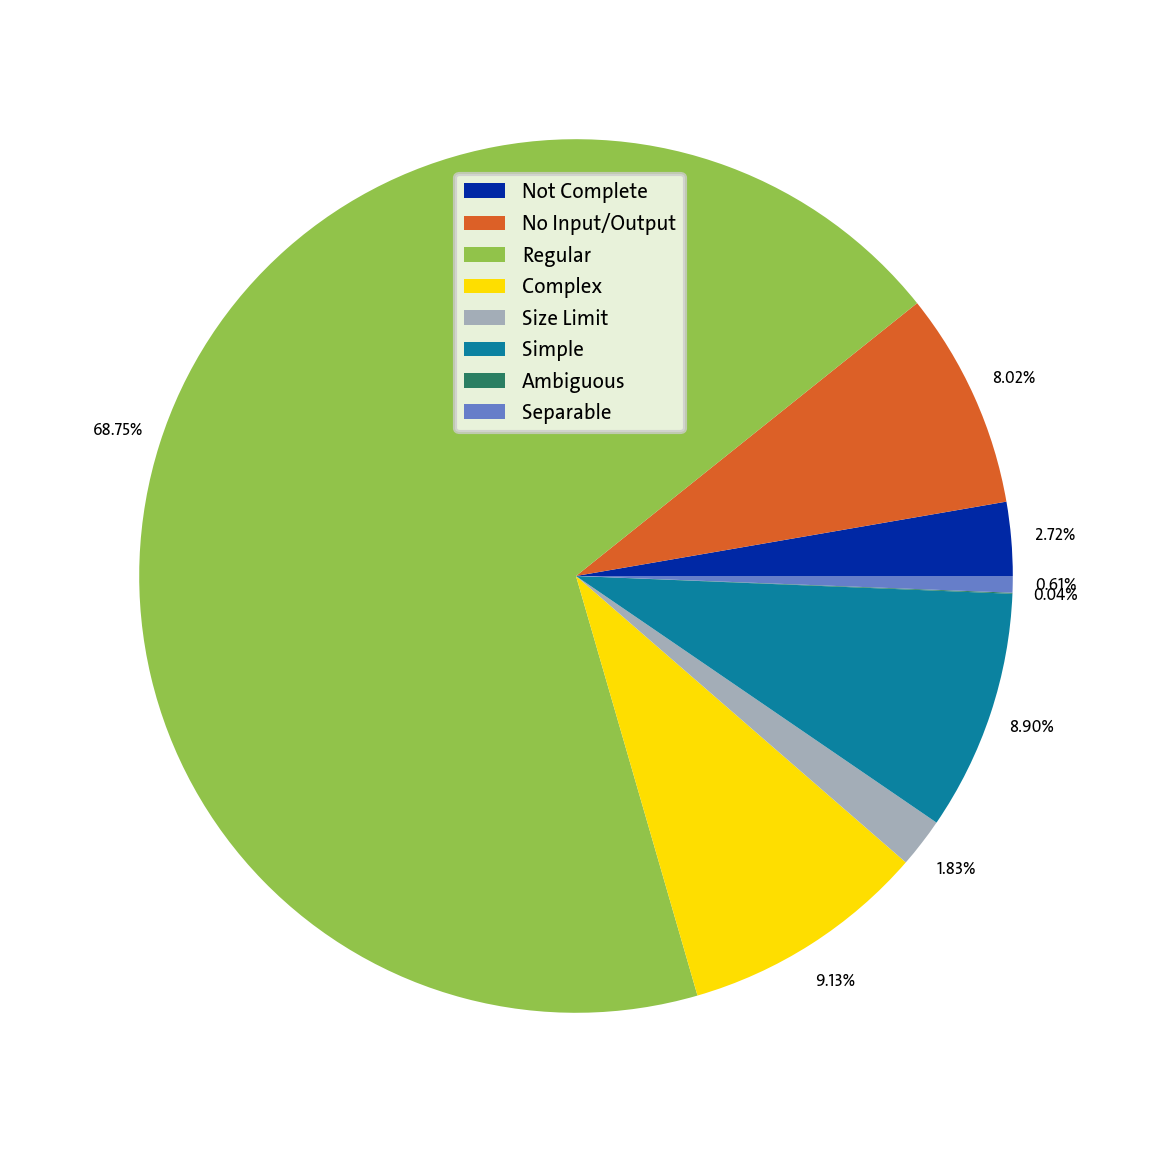

In [56]:
# Total Number of Transactions per Category (Pie Chart):

import matplotlib.pyplot as plt
from matplotlib import font_manager
import datetime
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')
#plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


# Initialize an empty dictionary to store the sums
sum_dict = {}

# Iterate through each dictionary in the list
for d in ALL_tx_classes_result:
    # Iterate through each key-value pair in the dictionary
    for key, value in d.items():
        # Add the value to the sum in sum_dict, initializing if the key doesn't exist
        sum_dict[key] = sum_dict.get(key, 0) + value

# sum_dict now contains the sums of all similar keys
print(sum_dict)


# Extract non-zero values and their corresponding labels
non_zero_values = [value for key, value in sum_dict.items() if value != 0]
#non_zero_labels = [key for key, value in sum_dict.items() if value != 0]
non_zero_labels = ['Not Complete', 'No Input/Output', 'Regular', 'Complex', 'Size Limit', 'Simple', 'Ambiguous', 'Separable']



# Plotting pie chart
fig, ax = plt.subplots()
ax.pie(non_zero_values, autopct='%1.2f%%', textprops={'fontsize': 4}, pctdistance=1.1)
ax.legend(non_zero_labels, fontsize=5, loc='center left', bbox_to_anchor=(0.38, 0.75))

plt.tight_layout()
# Total Number of Transactions per Category (Pie Chart):

#plt.title('Total Number of Transactions per Category')


plt.savefig('fig_untangling_pie_chart_NEW_01.pdf', bbox_inches='tight', facecolor='white')
plt.show()





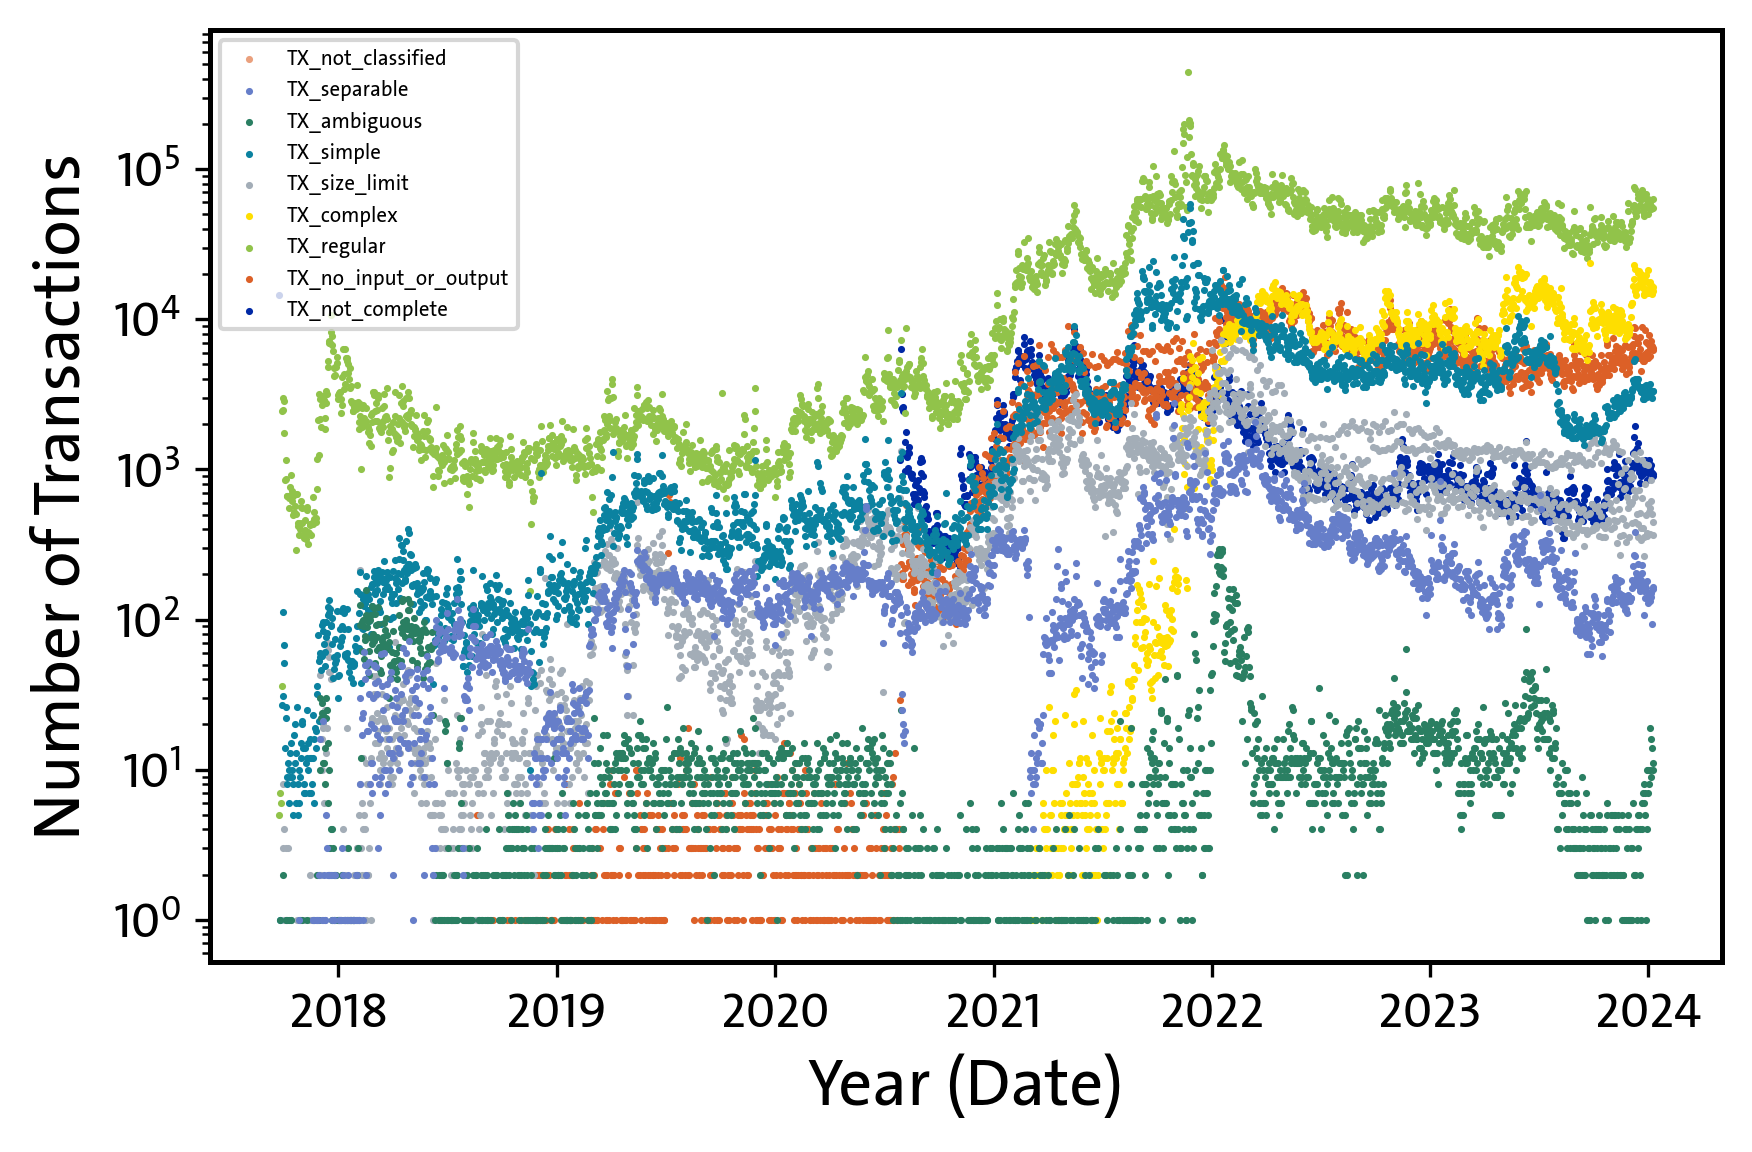

In [41]:
import matplotlib.pyplot as plt
import datetime

from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')
#plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')



INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2024-01-10 22:00:47', '%Y-%m-%d %H:%M:%S').date()

# Function to generate dates
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + datetime.timedelta(n)

# Generate the list of dates
dates = list(daterange(INITIAL_DATE_CARDANO, FINAL_DATE_CARDANO))



# Exclude the last dictionary and corresponding date
dict_list = ALL_tx_classes_result[:-1]
dates = dates[:-1]


# Ensure that the length of dict_list matches the length of dates
if len(dict_list) != len(dates):
    raise ValueError("The number of dictionaries does not match the number of days in the date range.")

# Extracting keys from the first dictionary
keys = dict_list[0].keys()

# Initialize a dictionary to store values for each key
values_by_key = {key: [] for key in keys}

# Extract values for each key
for d in dict_list:
    for key in keys:
        values_by_key[key].append(d.get(key, 0))  # Use 0 as default if key not found


#for key in keys:
#    plt.plot(dates, values_by_key[key], label=key, linewidth=0.5)

for key in keys:
    plt.scatter(dates, values_by_key[key], label=key, s=0.5)  # Using scatter plot




plt.xlabel('Year (Date)')
plt.ylabel('Number of Transactions')

plt.yscale('log')  # Logarithmic scale for y-axis
# Reverse the order of items in legend:
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
plt.legend(handles, labels, loc='upper left', fontsize=5)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping


#plt.savefig('fig_untangling_all_categories_DAY.pdf', bbox_inches='tight', facecolor='white')
plt.show()




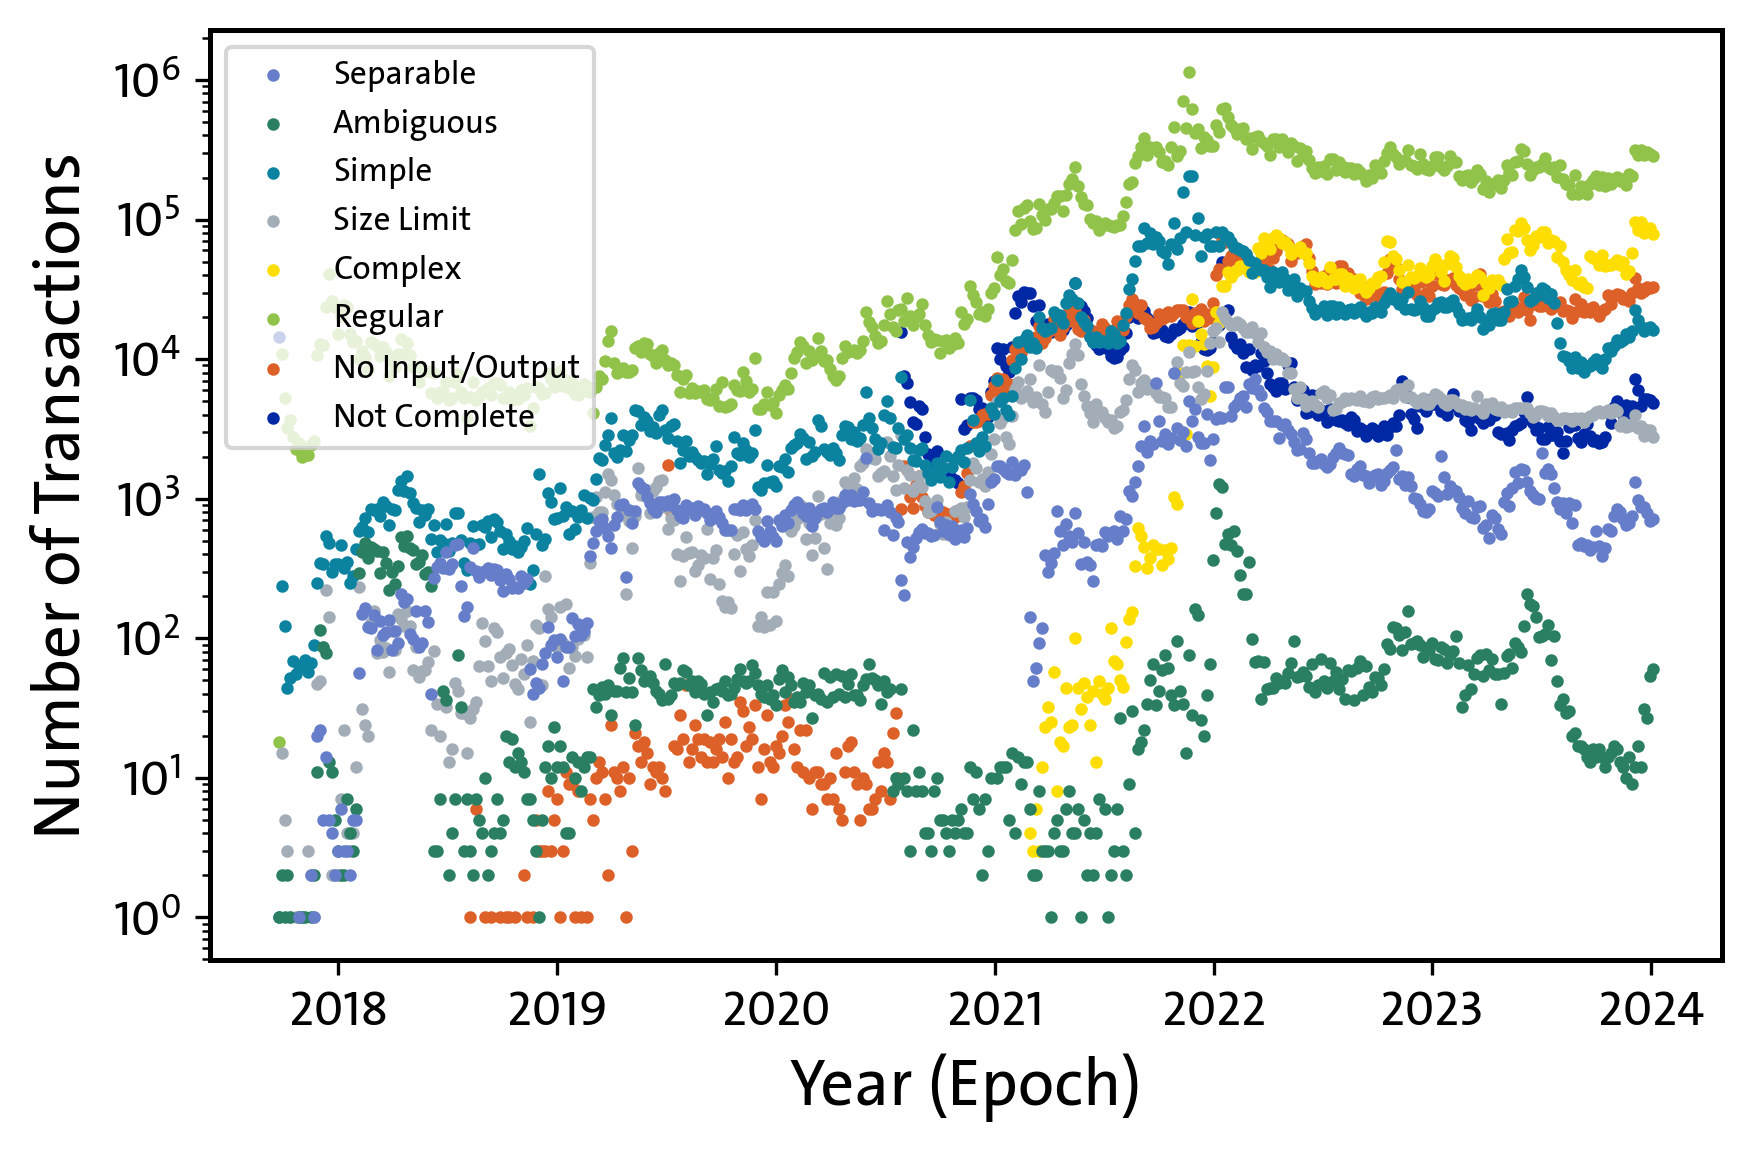

In [57]:
import matplotlib.pyplot as plt
import datetime
import numpy as np



from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')
#plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')



# Define the initial and final dates
INITIAL_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO = datetime.datetime.strptime('2024-01-10 22:00:47', '%Y-%m-%d %H:%M:%S').date()

# Function to generate dates
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + datetime.timedelta(n)

# Generate the list of dates
dates = list(daterange(INITIAL_DATE_CARDANO, FINAL_DATE_CARDANO))


# Exclude the last dictionary and corresponding date
dict_list = ALL_tx_classes_result[:-1]
dates = dates[:-1]

# Group dates into epochs (5-day intervals)
epoch_size = 5
epoch_dates = [dates[i] for i in range(0, len(dates), epoch_size)]

# Ensure that the length of dict_list matches the length of dates
if len(dict_list) != len(dates):
    raise ValueError("The number of dictionaries does not match the number of days in the date range.")

# Extracting keys from the first dictionary
keys = dict_list[0].keys()



# Initialize a dictionary to store summed values for each key
epoch_values_by_key = {key: [] for key in keys}

# Extract and sum values for each key per epoch
for key in keys:
    for i in range(0, len(dict_list), epoch_size):
        epoch_sum = sum(d.get(key, 0) for d in dict_list[i:i + epoch_size])
        epoch_values_by_key[key].append(epoch_sum)



#for key in keys:
#    plt.plot(dates, values_by_key[key], label=key, linewidth=0.5)

for key in keys:
    plt.scatter(epoch_dates, epoch_values_by_key[key], label=key, s=4)  # Scatter plot with smaller points


plt.xlabel('Year (Epoch)')
plt.ylabel('Number of Transactions')

plt.yscale('log')  # Logarithmic scale for y-axis
# Reverse the order of items in legend:
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()

#labels.reverse()
labels = [ 'Not_classified',
           'Separable',
           'Ambiguous',
           'Simple',
           'Size Limit',
           'Complex',
           'Regular',
           'No Input/Output',
           'Not Complete']

plt.legend(handles[1:], labels[1:], loc='upper left', fontsize=8)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping


plt.savefig('fig_untangling_all_categories_EPOCH_NEW_01.pdf', bbox_inches='tight', facecolor='white')
plt.show()



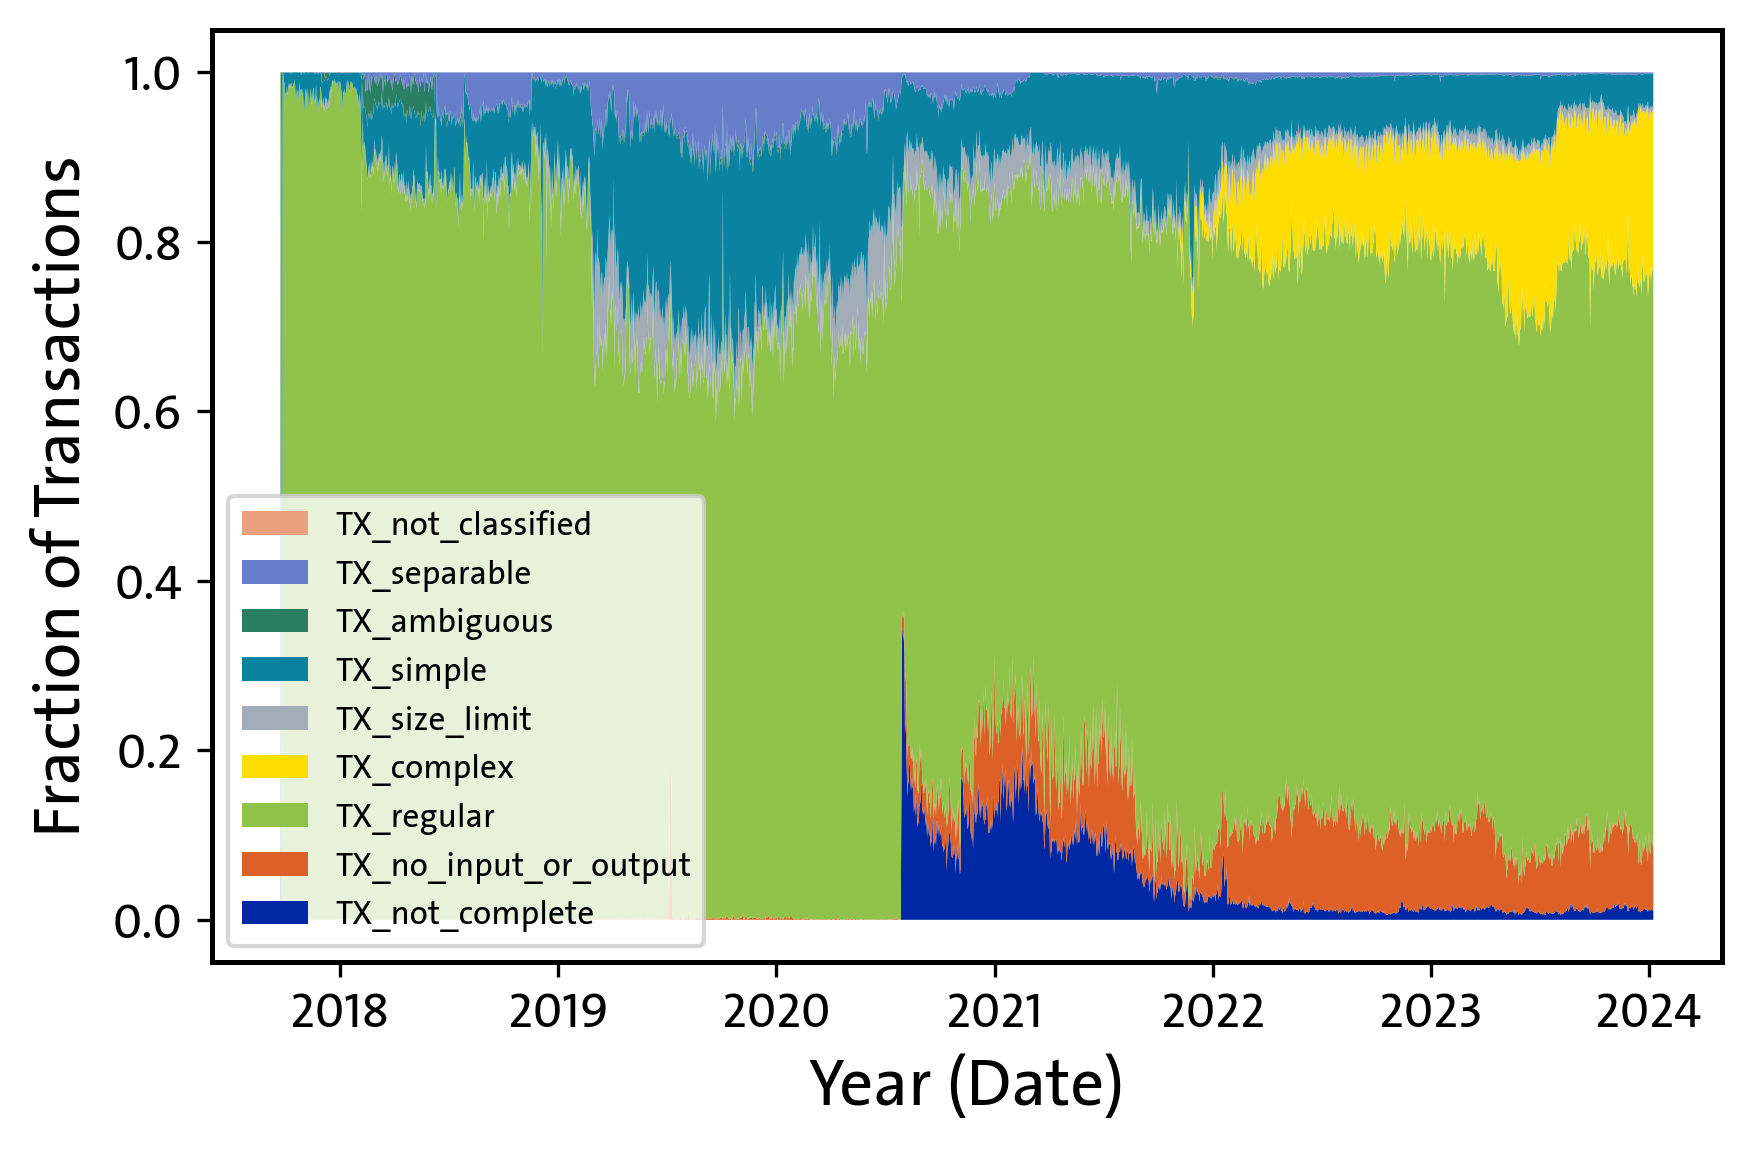

In [39]:
import matplotlib.pyplot as plt
import datetime
import numpy as np


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')
#plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')



# Define the initial and final dates
INITIAL_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO = datetime.datetime.strptime('2024-01-10 22:00:47', '%Y-%m-%d %H:%M:%S').date()

# Function to generate dates
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + datetime.timedelta(n)

# Generate the list of dates
dates = list(daterange(INITIAL_DATE_CARDANO, FINAL_DATE_CARDANO))


# Exclude the last dictionary and corresponding date
dict_list = ALL_tx_classes_result[:-1]
dates = dates[:-1]

# Group dates into epochs (5-day intervals)
epoch_size = 5
epoch_dates = [dates[i] for i in range(0, len(dates), epoch_size)]

# Ensure that the length of dict_list matches the length of dates
if len(dict_list) != len(dates):
    raise ValueError("The number of dictionaries does not match the number of days in the date range.")

# Extracting keys from the first dictionary
keys = dict_list[0].keys()

# Initialize a dictionary to store summed values for each key
daily_values_by_key = {key: [] for key in keys}


# Extract values for each key
for d in dict_list:
    for key in keys:
        daily_values_by_key[key].append(d.get(key, 0))  # Use 0 as default if key not found


# Convert sums to fractions
total_per_day = np.sum([np.array(values) for values in daily_values_by_key.values()], axis=0)
fractions_by_key = {key: np.array(values) / total_per_day for key, values in daily_values_by_key.items()}

# Prepare data for stacked area plot
cumulative_fractions = np.cumsum([fractions_by_key[key] for key in keys], axis=0)


# Initial base line for stacking
baseline = np.zeros(len(dates))


# Plot each category
for i, key in enumerate(keys):
    plt.fill_between(dates, baseline, cumulative_fractions[i, :], label=key)
    baseline = cumulative_fractions[i, :]


plt.xlabel('Year (Date)')
plt.ylabel('Fraction of Transactions')

# Reverse the order of items in legend:
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
plt.legend(handles, labels, loc='lower left', fontsize=8)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping


#plt.savefig('fig_untangling_fraction_of_categories_DAILY.pdf', bbox_inches='tight', facecolor='white')
plt.show()



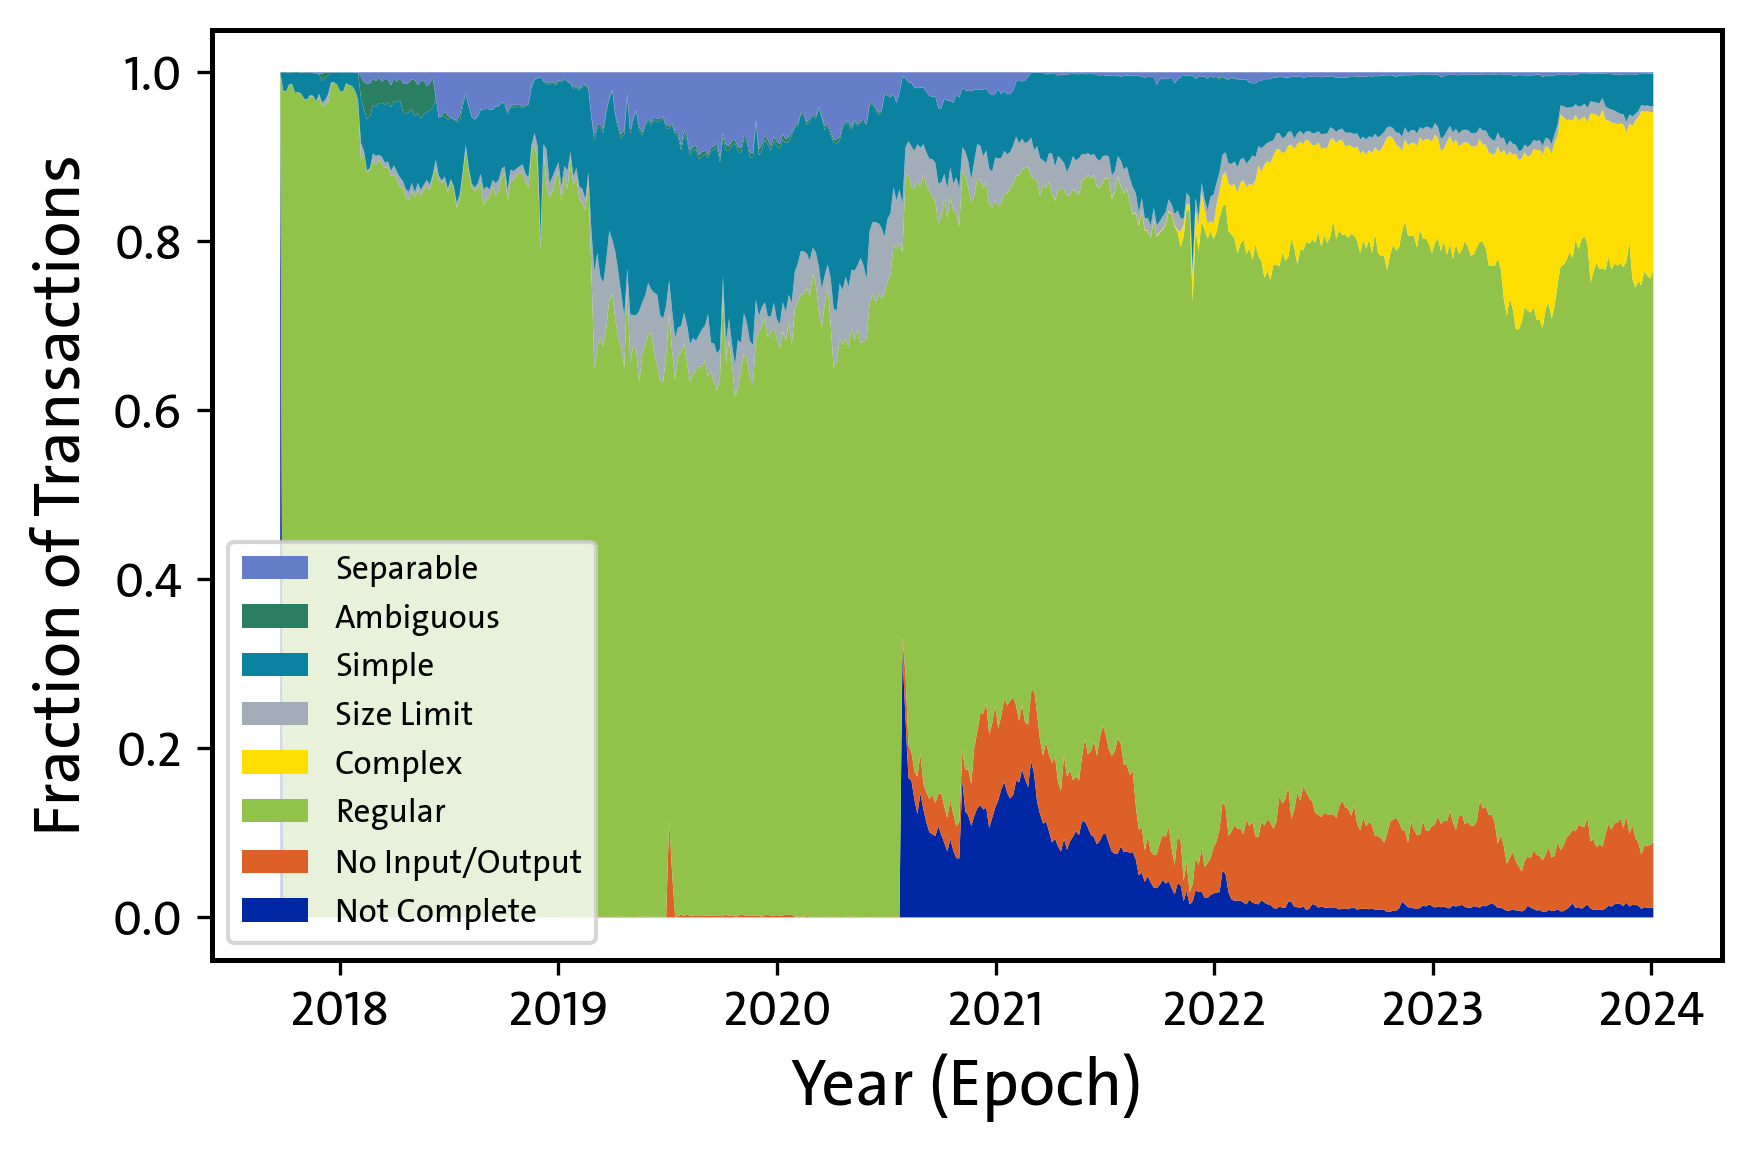

In [58]:
import matplotlib.pyplot as plt
import datetime
import numpy as np


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')
#plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')



# Define the initial and final dates
INITIAL_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO = datetime.datetime.strptime('2024-01-10 22:00:47', '%Y-%m-%d %H:%M:%S').date()

# Function to generate dates
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + datetime.timedelta(n)

# Generate the list of dates
dates = list(daterange(INITIAL_DATE_CARDANO, FINAL_DATE_CARDANO))


# Exclude the last dictionary and corresponding date
dict_list = ALL_tx_classes_result[:-1]
dates = dates[:-1]

# Group dates into epochs (5-day intervals)
epoch_size = 5
epoch_dates = [dates[i] for i in range(0, len(dates), epoch_size)]

# Ensure that the length of dict_list matches the length of dates
if len(dict_list) != len(dates):
    raise ValueError("The number of dictionaries does not match the number of days in the date range.")

# Extracting keys from the first dictionary
keys = dict_list[0].keys()

# Initialize a dictionary to store summed values for each key
epoch_values_by_key = {key: [] for key in keys}


# Sum values for each key per epoch
for key in keys:
    for i in range(0, len(dict_list), epoch_size):
        epoch_sum = sum(d.get(key, 0) for d in dict_list[i:i + epoch_size])
        epoch_values_by_key[key].append(epoch_sum)

# Convert sums to fractions
total_per_epoch = np.sum([np.array(values) for values in epoch_values_by_key.values()], axis=0)
fractions_by_key = {key: np.array(values) / total_per_epoch for key, values in epoch_values_by_key.items()}

# Prepare data for stacked area plot
cumulative_fractions = np.cumsum([fractions_by_key[key] for key in keys], axis=0)


# Initial base line for stacking
baseline = np.zeros(len(epoch_dates))

# Plot each category
for i, key in enumerate(keys):
    plt.fill_between(epoch_dates, baseline, cumulative_fractions[i, :], label=key)
    baseline = cumulative_fractions[i, :]

plt.xlabel('Year (Epoch)')
plt.ylabel('Fraction of Transactions')

# Reverse the order of items in legend:
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()

#labels.reverse()
labels = [ 'Not_classified',
           'Separable',
           'Ambiguous',
           'Simple',
           'Size Limit',
           'Complex',
           'Regular',
           'No Input/Output',
           'Not Complete']

plt.legend(handles[1:], labels[1:], loc='lower left', fontsize=8)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping


plt.savefig('fig_untangling_fraction_of_categories_EPOCH_NEW_01.pdf', bbox_inches='tight', facecolor='white')
plt.show()
